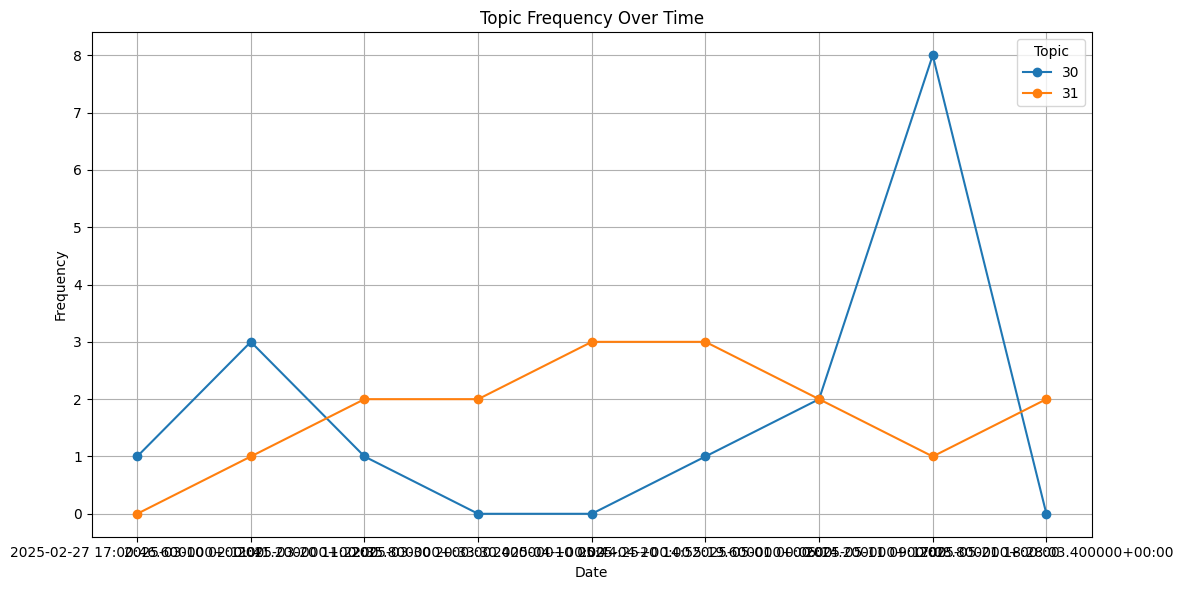

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load trends
df = pd.read_csv('../data/trends.csv', parse_dates=['Timestamp'])
df = df[df['Topic'] != -1]
df = df[df['Topic'].isin([30, 31])]

# 1) Group by Timestamp & Topic to aggregate Frequency
grouped = (
    df
    .groupby(['Timestamp', 'Topic'])['Frequency']
    .sum()
    .reset_index()
)

# 2) Pivot so each Topic is a column
pivot = grouped.pivot(index='Timestamp', columns='Topic', values='Frequency').fillna(0)

# 3) Plot
pivot.plot(figsize=(12, 6), marker='o')
plt.title('Topic Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()
